In [2]:
import numpy as np
import pydicom
from matplotlib import pyplot as plt
from skimage.io import imread, imsave

from pydicom import dcmread
from pydicom.data import get_testdata_file

import struct
import json
import tifffile

def unpack_tag(data, tag):
    print(len(data[tag].value))
    return struct.unpack('f', data[tag].value)[0]

In [2]:
import skimage.io as io

path = "/home/ke/SGD/data/00-MetaImage/00-P.mhd"
img = io.imread(path, plugin='simpleitk')

In [3]:
from FORBILD_3D import *

In [4]:
import requests
# Load the FORBILD Head phantom file
url = "https://raw.githubusercontent.com/RTKConsortium/Forbild/refs/heads/main/Head"
phantom_text = requests.get(url).text
shapes = parse_forbild_phantom(phantom_text)

In [6]:
projections = simulate_projection_gpu(shapes, n_angles=4, det_width=128, det_height=128,
                                       src_iso_dist=100.0, det_iso_dist=100.0,
                                       det_size_x=100.0, det_size_y=100.0)
print("Projections array shape:", projections.shape)

TypeError: simulate_projection_gpu() got an unexpected keyword argument 'n_angles'

In [ ]:
projections = simulate_projections_gpu(shapes, n_angles=4, det_width=128, det_height=128,
                                       src_iso_dist=100.0, det_iso_dist=100.0,
                                       det_size_x=100.0, det_size_y=100.0)
print("Projections array shape:", projections.shape)

In [4]:
cone_phantom = [Cone(
    base_center=np.array([0.0, 0.0, -25.0], dtype=np.float32),
    axis=np.array([0.0, 0.0, 1.0], dtype=np.float32),
    height=50.0,
    radius_base=40.0,
    radius_top=20.0,
    density=1.0
)]

# Run simulation
cone_proj = simulate_projections(cone_phantom, n_angles=1, det_width=128, det_height=128,
                                       src_iso_dist=1000.0, det_iso_dist=1000.0,
                                       det_size_x=500.0, det_size_y=500.0)

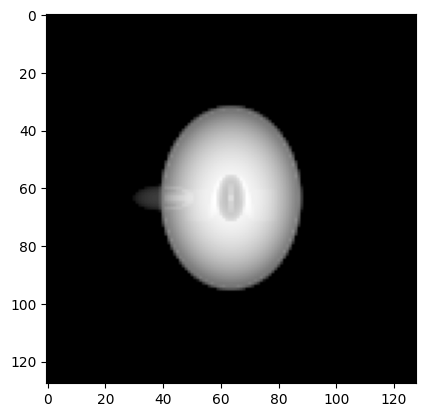

In [12]:
plt.imshow(projections[1], cmap='gray')

In [3]:
ds = dcmread("/home/ke/SGD/data/L170/08-25-2018-NA-NA-09480/1.000000-Full dose projections-77106/1-20002.dcm")
print(ds)
                                                           # intercept = np.float64(ds.RescaleIntercept)

slope = np.float64(ds.RescaleSlope)
intercept = np.float64(ds.RescaleIntercept)
hu_factor = float(ds[0x70411001].value)
arr = ds.pixel_array.astype(np.float64) * slope + intercept
arr = (arr-hu_factor)/hu_factor*1000

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Raw Data Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113713.4.2.369694803413105450619448600480459249467
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Raw Data Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113713.4.2.369694803413105450619448600480459249467
(0008, 0020) Study Date                          DA: '20180825'
(0008, 0021) Series Date                         DA: '20180825'


In [28]:
import struct

# Extracting specific DICOM tags and unpacking them
DetectorElementTransverseSpacing = struct.unpack('f', ds[0x7029, 0x1002].value)
DetectorElementAxialSpacing = struct.unpack('f', ds[0x7029, 0x1006].value)
DetectorFocalCenterAngularPosition = struct.unpack('f', ds[0x7031, 0x1001].value)
FocalCenter = struct.unpack('ff', ds[0x7031, 0x1033].value)
SourceAngularPositionShift = struct.unpack('f',ds[0x7033, 0x100B].value)
SourceAxialPositionShift = struct.unpack('f',ds[0x7033, 0x100C].value)
SourceRadialDistanceShift = struct.unpack('f',ds[0x7033, 0x100D].value)
NumberofSourceAngularSteps = struct.unpack('h', ds[0x7033, 0x1013].value)

print("DetectorElementTransverseSpacing:", DetectorElementTransverseSpacing)
print("DetectorElementAxialSpacing:", DetectorElementAxialSpacing)
print()
print("DetectorFocalCenterAngularPosition:", DetectorFocalCenterAngularPosition)
print("FocalCenter:", FocalCenter)
print("SourceAngularPositionShift:", SourceAngularPositionShift)
print("SourceAxialPositionShift:", SourceAxialPositionShift)
print("SourceRadialDistanceShift:", SourceRadialDistanceShift)
print("NumberofSourceAngularSteps:", NumberofSourceAngularSteps)

DetectorElementTransverseSpacing: (1.285839319229126,)
DetectorElementAxialSpacing: (1.0947227478027344,)

DetectorFocalCenterAngularPosition: (2.4516422748565674,)
FocalCenter: (369.625, 32.5)
SourceAngularPositionShift: (0.00033308350248262286,)
SourceAxialPositionShift: (-0.6600000262260437,)
SourceRadialDistanceShift: (5.450033187866211,)
NumberofSourceAngularSteps: (2304,)


In [30]:
arr[250]

array([-9.860e+02, -1.012e+03, -1.013e+03, -1.012e+03, -1.019e+03,
       -1.021e+03, -1.012e+03, -9.990e+02, -1.008e+03, -1.002e+03,
       -9.870e+02, -1.001e+03, -1.019e+03, -1.014e+03, -1.011e+03,
       -1.007e+03, -9.990e+02, -9.990e+02, -1.005e+03, -1.005e+03,
       -9.920e+02, -9.850e+02, -9.870e+02, -9.980e+02, -1.000e+03,
       -1.012e+03, -1.010e+03, -9.940e+02, -9.940e+02, -1.005e+03,
       -1.009e+03, -1.013e+03, -9.940e+02, -9.790e+02, -1.002e+03,
       -1.001e+03, -1.000e+03, -1.001e+03, -9.900e+02, -9.790e+02,
       -9.810e+02, -9.640e+02, -9.730e+02, -1.001e+03, -9.930e+02,
       -9.900e+02, -9.850e+02, -9.930e+02, -9.780e+02, -9.670e+02,
       -9.790e+02, -9.870e+02, -9.290e+02, -6.370e+02, -1.680e+02,
       -2.000e+01, -2.600e+01,  5.000e+00,  1.600e+01,  2.000e+00,
       -4.000e+00, -8.000e+00,  9.000e+00, -6.000e+00, -2.100e+01,
       -2.500e+01, -2.500e+01,  3.000e+00,  8.000e+00, -1.600e+01,
       -3.000e+00,  1.700e+01,  2.100e+01,  2.500e+01,  7.000e

In [7]:
def load_tiff_stack_with_metadata(file):
    '''

    :param file: Path object describing the location of the file
    :return: a numpy array of the volume, a dict with the metadata
    '''
    if not (file.endswith('.tif') or file.endswith('.tiff')):
        raise FileNotFoundError('File has to be tif.')
    with tifffile.TiffFile(file) as tif:
        data = tif.asarray()
        metadata = tif.pages[0].tags["ImageDescription"].value
    metadata = metadata.replace("'", "\"")
    try:
        metadata = json.loads(metadata)
    except:
        print('The tiff file you try to open does not seem to have metadata attached.')
        metadata = None
    return data, metadata

s, metadata = load_tiff_stack_with_metadata("../helix2fan/out/scan_L170_flat_fan_projections.tif")
# plt.imshow(s[:, :, 30], cmap='gray')

angles = np.array(metadata['angles'])[:metadata['rotview']] + (np.pi / 2)
print(angles)
dz = metadata['dz']
print(dz)
drho = metadata['drho']
print(drho)

[-3.58883327 -3.58610618 -3.58337912 ...  2.68617079  2.68889788
  2.69162494]
[0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.6600000262260437, 0.0, -0.66